This model tests whether a person qualifies for personal loan or not based on various continuous and categorical variables

Credits: https://www.kaggle.com/code/rishavchowdhury0123/personal-loan-classification-auc-0-998

In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics



This line of code reads a CSV file named 'Bank_Personal_Loan_Modelling.csv'

In [28]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

The head() method in Pandas is used to display the first few rows of a DataFrame, which can be helpful for quickly inspecting the data and understanding its structure.

In [29]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


The code df.columns returns a list of column names in the DataFrame df. It's a useful way to quickly inspect the names of the columns in your dataset.

In [30]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

The code df.info() is used to get a concise summary of the DataFrame df. It provides information about the DataFrame's structure, including the number of non-null entries, the data types of each column, and memory usage.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


The code df.isna().sum() is used to count the number of missing values (NaN or Not a Number) in each column of the DataFrame df. The result is a Series where the index corresponds to the column names, and the values represent the number of missing values in each respective column.

In [32]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

The code df.shape returns a tuple that represents the dimensions of the DataFrame df. Specifically, it returns the number of rows and columns in the DataFrame.

In [33]:
df.shape

(5000, 14)

Created a list called X containing feature names. These feature names seem to correspond to different attributes.

In [34]:
X = ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg','Education', 'Mortgage','Securities Account','CD Account', 'Online', 'CreditCard'] 

This code generates a grid of subplots for visualizing the relationship between the features in X and the target variable 'Personal Loan' using scatter plots.This code is useful for visually inspecting the relationship between each feature and the target variable 'Personal Loan'. It's particularly helpful when trying to understand how each feature might influence the likelihood of obtaining a personal loan.

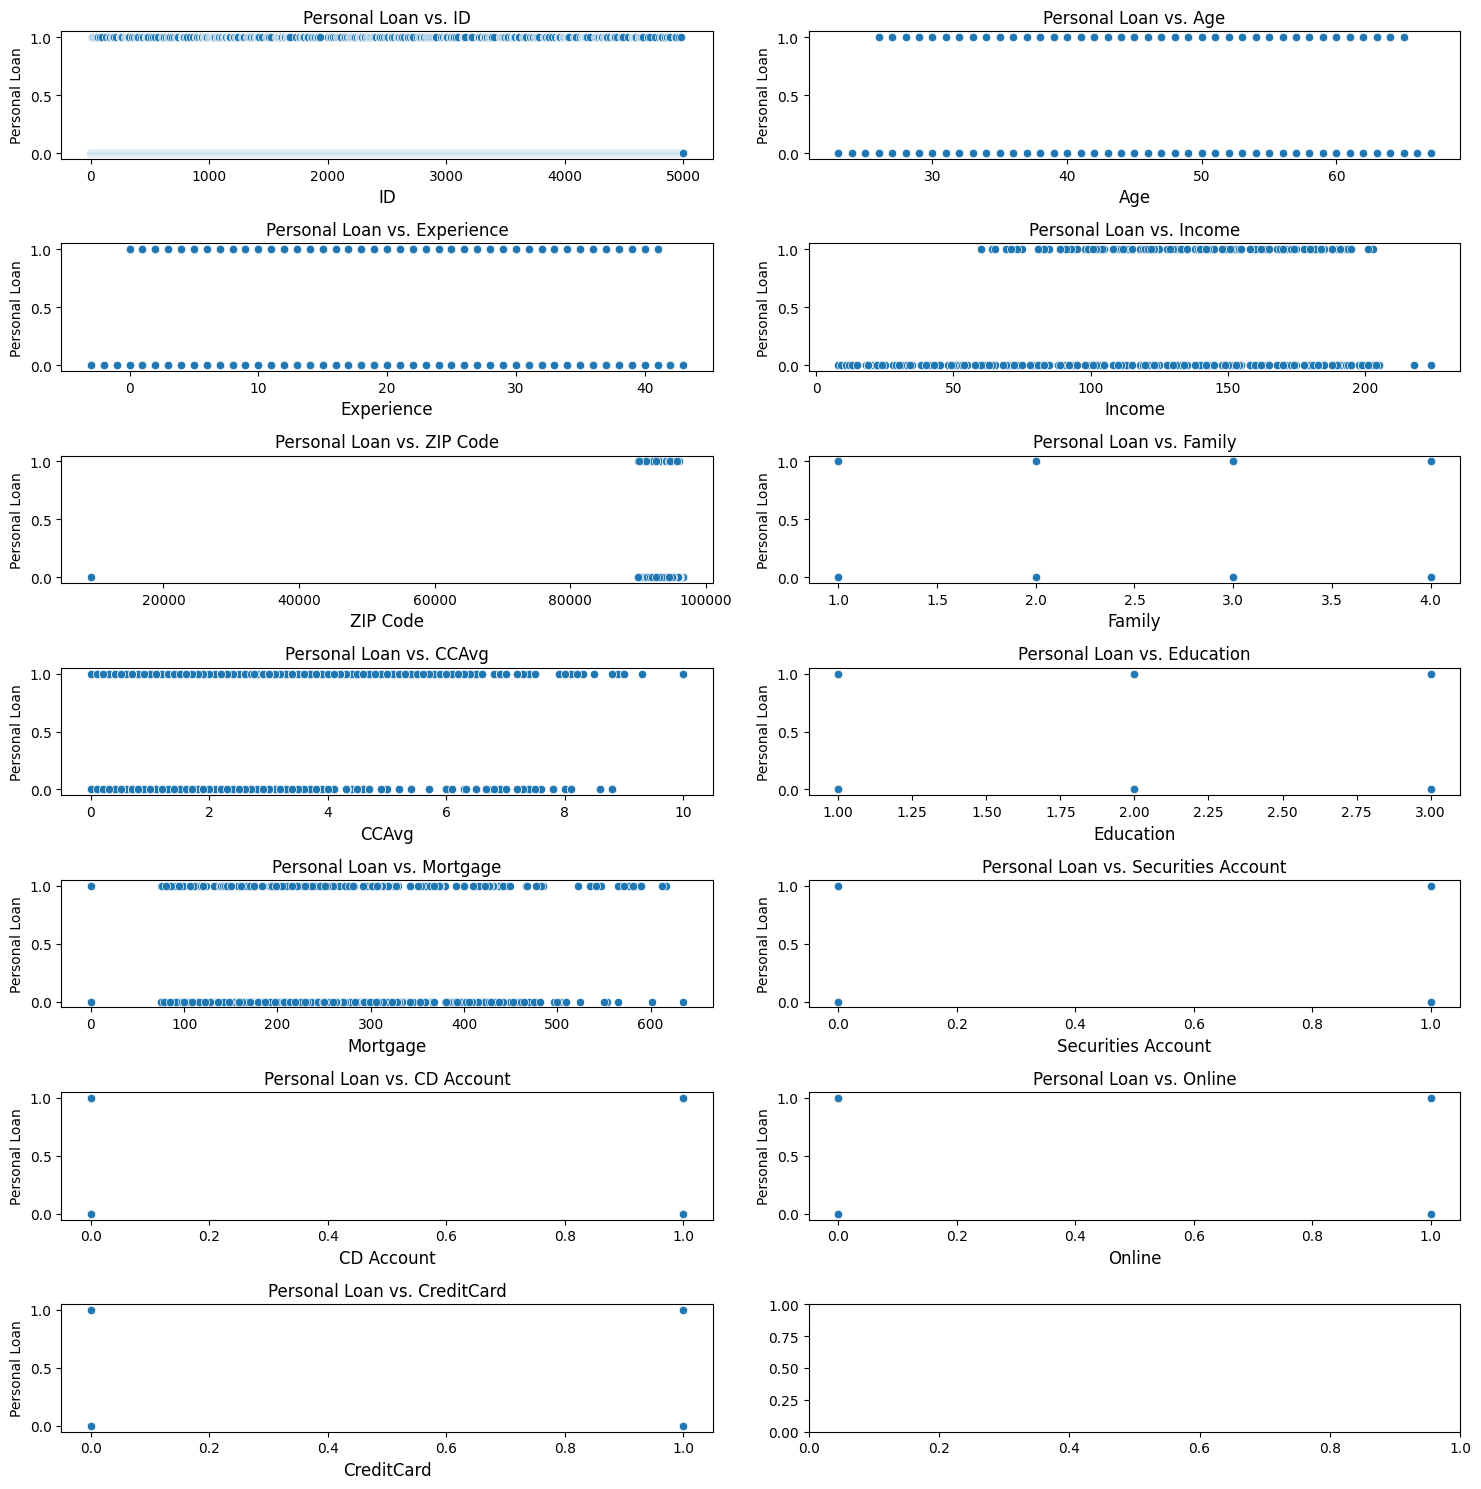

In [35]:
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(15,15), dpi=100)

for i in range(len(X)):
    x = i//2
    y = i%2
    ax[x,y].set_xlabel(X[i], size = 12)
    ax[x,y].set_title('{} vs. {}'.format('Personal Loan',X[i]))
    sns.scatterplot(x=X[i],y=df['Personal Loan'],data = df,ax=ax[x,y])
plt.tight_layout()


    Experience has negative values.


In [36]:
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)



Experience will not be negative so changing it to positive


In [37]:
df['Experience'] = df['Experience'].abs()

In [38]:
catogorical = ['Age','Experience', 'Income', 'Family']

This code is useful for visualizing the distribution of each categorical variable in your dataset using box plots. It can help you identify any potential outliers and gain insights into the spread of the data for each feature.

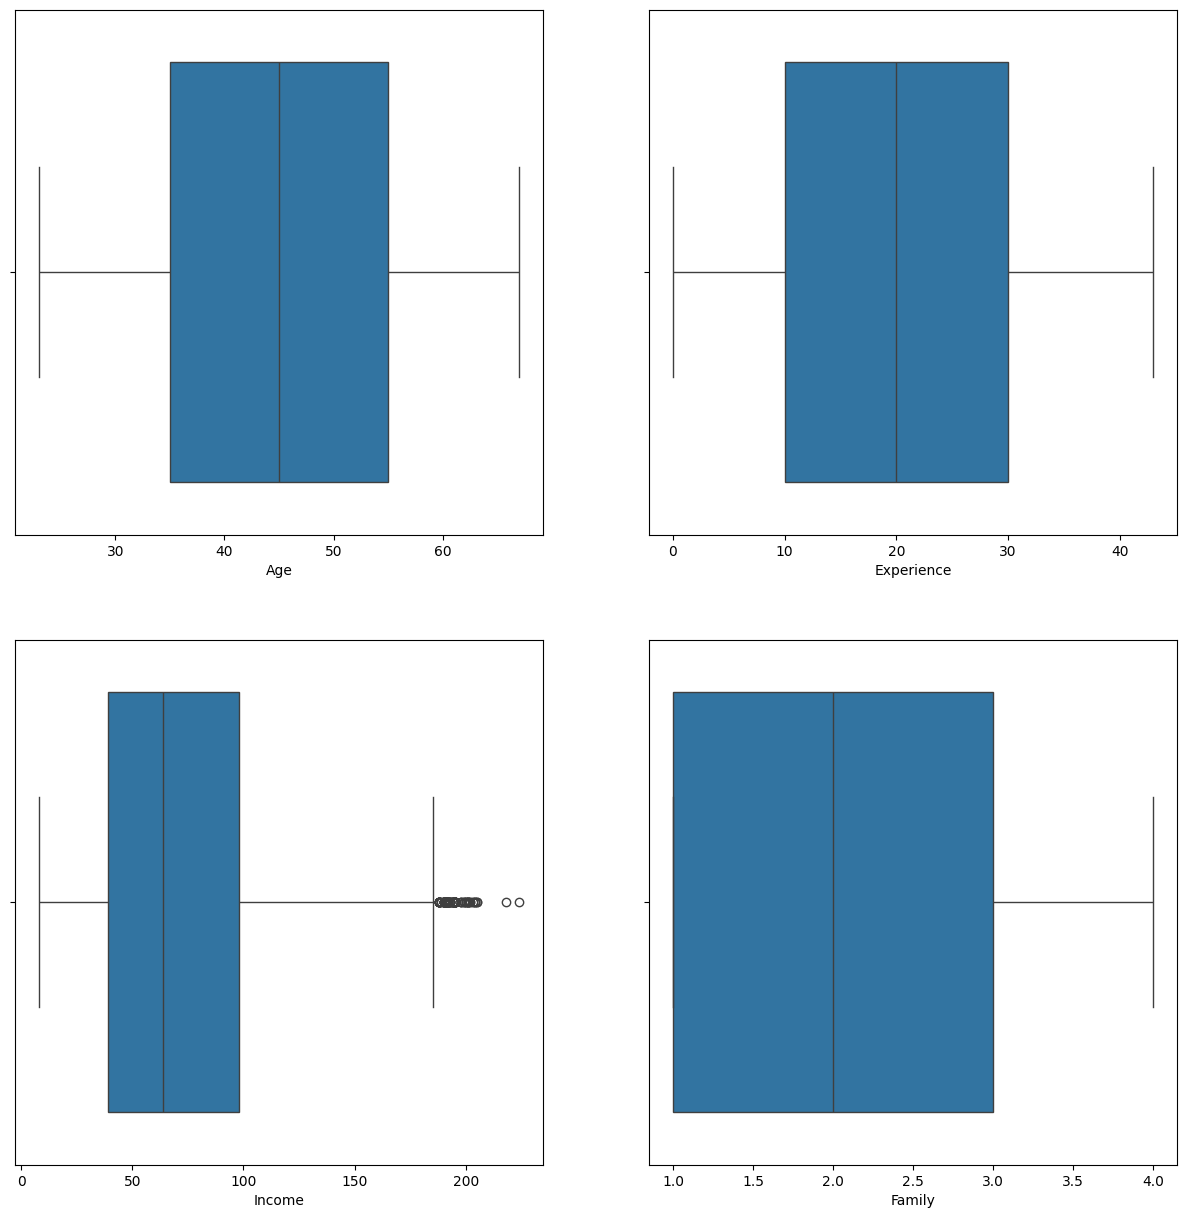

In [39]:
fig,ax = plt.subplots(2,2,figsize=(15,15))
for i in range(len(catogorical)):
    x = i//2
    y = i%2
    sns.boxplot(data = df,x=catogorical[i],ax=ax[x,y])



As we observe income has outliers


In [40]:
income_outlier_idx = df[df['Income']>160].index
df = df.drop(income_outlier_idx)



Removed those outliers


<Axes: xlabel='Income'>

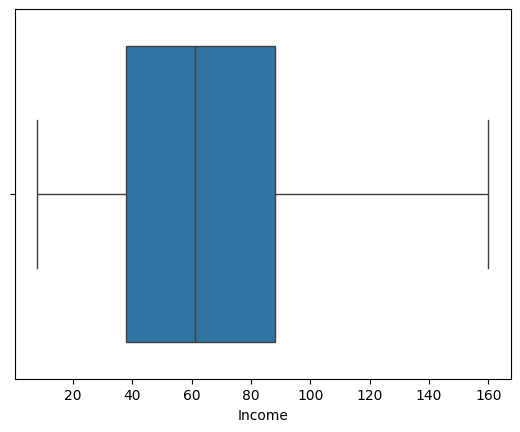

In [41]:
sns.boxplot(x=df['Income'])

This setup allows to train a model using the features in x to predict the target variable y.

In [42]:
x = df[X]
y = df['Personal Loan']

df[X].shape is used to get the dimensions of the subset of the DataFrame df containing only the columns specified in the list X. Specifically, it returns the number of rows and columns in this subset.

In [43]:
df[X].shape

(4665, 13)

This code is using the train_test_split function from scikit-learn to split your data into training and testing sets. Here's what each variable represents:

    X_train: This will be the training set of features.
    X_test: This will be the testing set of features.
    y_train: This will be the corresponding training set of target values.
    y_test: This will be the corresponding testing set of target values.

The train_test_split function randomly splits the data into training and testing sets. By default, 80% of the data will be used for training (X_train and y_train), and 20% will be used for testing (X_test and y_test), as specified by the test_size=0.2 argument.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

This code is using the StandardScaler from scikit-learn to standardize the features in both the training and testing sets. Standardization (or Z-score normalization) is a common preprocessing step in machine learning that helps to scale features to have zero mean and unit variance. Standardizing features is important because it helps to ensure that all features contribute equally to the learning process, and it can improve the performance of certain machine learning algorithms.

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [46]:
SVM_model = SVC()
SVM_model.fit(X_train,y_train)
SVM_pred = SVM_model.predict(X_test)
SVM_model.score(X_test,y_test),metrics.accuracy_score(y_test,SVM_pred)

(0.9785637727759914, 0.9785637727759914)

This code is evaluating the performance of the Support Vector Machine (SVM) model on both the training and testing sets, using the accuracy_score and classification_report functions from scikit-learn.

In [47]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_train = SVM_model.predict(X_train)
y_pred_test = SVM_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_pred_test))


Train Accuracy: 0.9812433011789925
Test Accuracy: 0.9785637727759914

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       883
           1       0.94      0.64      0.76        50

    accuracy                           0.98       933
   macro avg       0.96      0.82      0.88       933
weighted avg       0.98      0.98      0.98       933



The resulting heatmap will visually represent the performance of your SVM model in terms of true positive, true negative, false positive, and false negative predictions. It provides a visual summary of how well your model is classifying the data.

Text(50.722222222222214, 0.5, 'y_predicted')

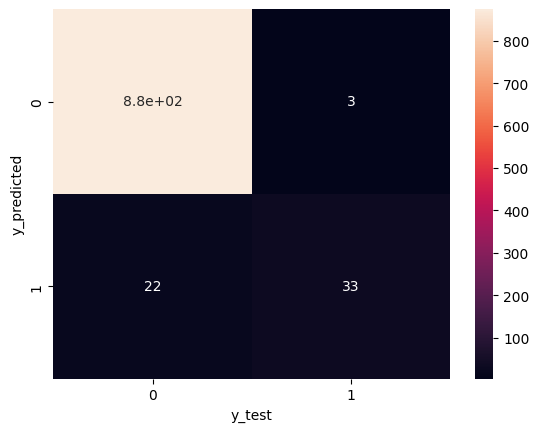

In [ ]:
sns.heatmap(confusion_matrix(y_test,SVM_pred),annot = True)
plt.xlabel('y_test')
plt.ylabel('y_predicted')

This code uses the cross_val_score function from scikit-learn to perform cross-validation on a Support Vector Classifier (SVC) model. Here's an accuracy score on 5 parts of it. It can predict unseen data with 93% accuracy

In [ ]:
cross_val_score(SVC(),x,y)

array([0.93569132, 0.93461951, 0.93461951, 0.93461951, 0.93461951])

Pros of SVM:

    1. Effective in High-Dimensional Spaces: SVMs are effective even in high-dimensional spaces, making them suitable for complex real-world problems.

    2. Robust against Overfitting: SVMs are less prone to overfitting compared to some other models. This is because they try to maximize the margin between classes, which reduces the risk of fitting noise in the data.

    3. Versatility with Kernels: SVMs can use different kernel functions (e.g., linear, polynomial, radial basis function) to adapt to different types of data. This allows for great flexibility in modeling complex relationships.

    4. Capable of Handling Non-Linear Relationships: With the use of non-linear kernels, SVMs can effectively model non-linear relationships between features and target variables.

Cons of SVM:

    1. Computationally Intensive: Training an SVM can be computationally expensive, especially for large datasets. This is particularly true when using non-linear kernels.

    2. Inefficiency with Large Datasets: SVMs may become impractical for very large datasets due to their computational complexity.

    3. Less Intuitive Model Interpretation: Unlike some other models (e.g., decision trees), SVMs don't provide as much insight into the relationships between features and the target variable. They work well as black-box models but may not offer as much interpretability.

    4. Not Well-Suited for Noisy Data: SVMs are less effective when the dataset has a lot of noise or overlapping classes, as they are sensitive to misclassifications.